In [122]:
import numpy as np
import matplotlib.image as img
from PIL import Image
import numpy.fft as fft 
import matplotlib.pyplot as plt


<img src= 'Practica_3_1.jpg' width="600px">

### 1) Training on FFT in 1D

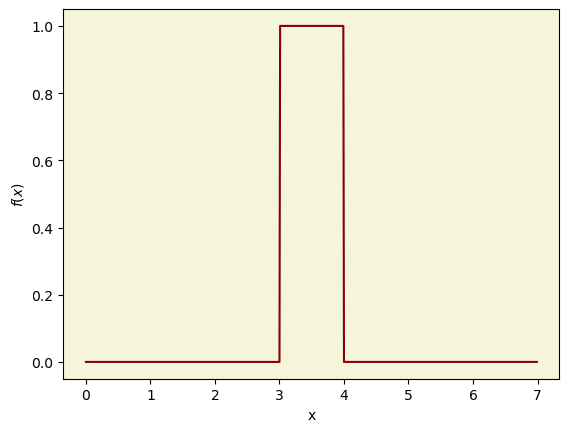

In [116]:
# 1) First, the function is defined by 
def f(x): 
    return 1*((x<4)&(x>3))+0*((x<3)&(x>4))

# the plot is   
x=np.arange(0,7,0.01)

fig, ax  = plt.subplots()

ax.plot(x,f(x), color='darkred')
ax.set_xlabel('x')
ax.set_ylabel('$f(x)$')
ax.set_facecolor('beige')

In [117]:
# now, the Fourier transform of f(x) is
Trans_f =fft.fft(f(x))
# the frecuency is 

k =np.fft.fftfreq(x.shape[-1],0.01)

/tmp/ipykernel_5569/1327129381.py:1: RuntimeWarning: invalid value encountered in true_divide
  f_k = 100*np.sin(k*np.pi)/(k*np.pi)


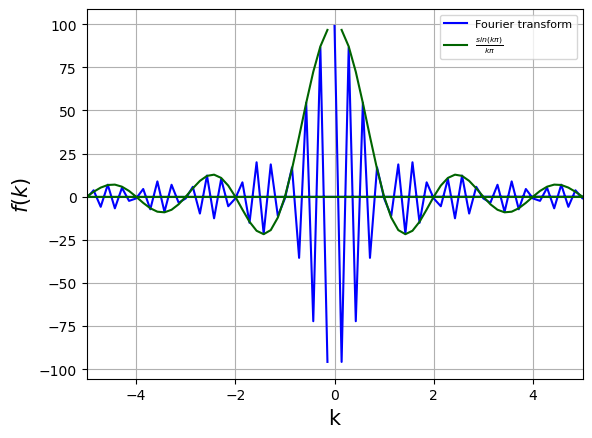

In [120]:

f_k = 100*np.sin(k*np.pi)/(k*np.pi)

# the plot for the Fourier transform is 
plt.plot(k,Trans_f, color='blue',label ='Fourier transform')
plt.plot(k,f_k, color='darkgreen',label ='$\\frac{sin(k \pi )}{k \pi } $')
plt.xlim(-5,5)
plt.legend(fontsize=8)
plt.xlabel('k', size=15)
plt.ylabel('$f(k)$', size=15)
plt.grid()

/home/alfonsozapata/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


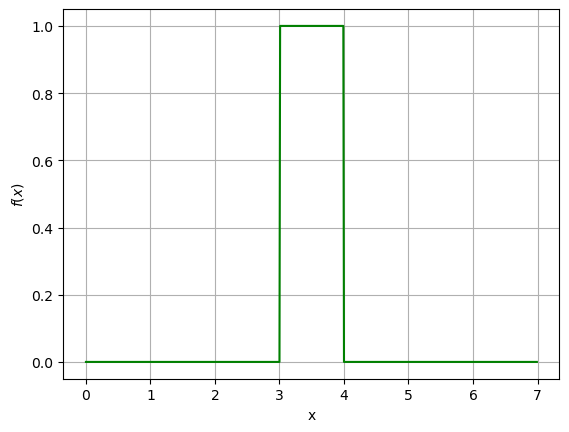

In [121]:
# now we check if the inverse of the Fourier transform
inv_f =fft.ifft(Trans_f)
# and the plot it 
plt.plot(x, inv_f, color='green')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.grid()

<img src= 'Practica_3_2.jpg' width="600px">

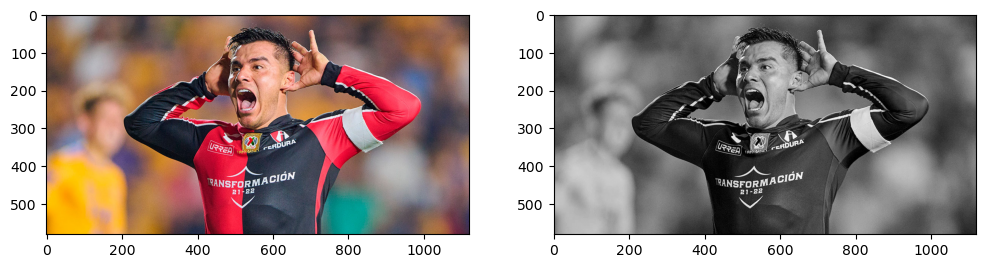

In [135]:

plt.figure(figsize=(12,6))
# the image is
plt.subplot(1, 2, 1)
imagen1 = img.imread('rocha.jpg')
plt.imshow(imagen1)

# and in black and white is 
plt.subplot(1, 2, 2)
imagen1 = imagen1[:,:,1]
plt.imshow(imagen1, cmap='gray')


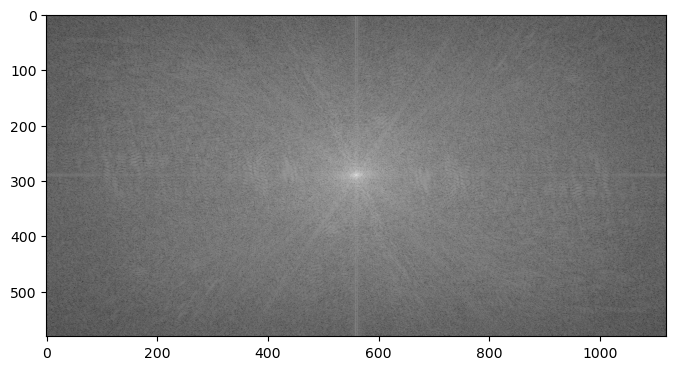

In [140]:
#now we need to calculate the Fourier transform for the image, i.e. in 2D
imagen1_trans =fft.fftshift(fft.fft2(imagen1))
#the plot is 
plt.figure(figsize=(8, 6))
plt.imshow(np.log(abs(imagen1_trans)),cmap='gray')

/tmp/ipykernel_5569/1025171883.py:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(T_1)), cmap='gray')


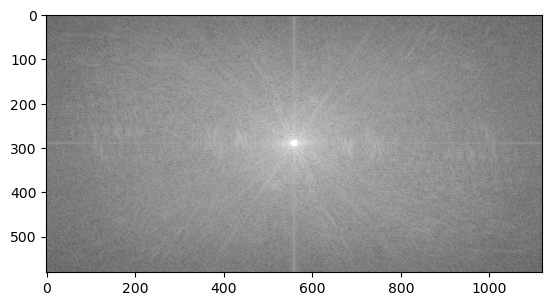

In [153]:
#definimos las dimensiones de nuestra máscara para aplicarla a la imagen
rows, cols = imagen1_trans.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols), np.uint8)
#definimos el tamaño del radio y el centro
r = 5
center = [crow, ccol]
#se define la malla de valores por los que se multiplicará a la imagen
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0.0

#aplicar la máscara significa multiplicar el arreglo mask por la transformada de la imagen
T_1 =imagen1_trans*mask

#observamos qué efecto hace sobre la transformada
plt.imshow(np.log(abs(T_1)), cmap='gray')
#invertimos el shift
imagen11  = fft.ifftshift(T_1)
imagen1 = fft.ifft2(imagen11)

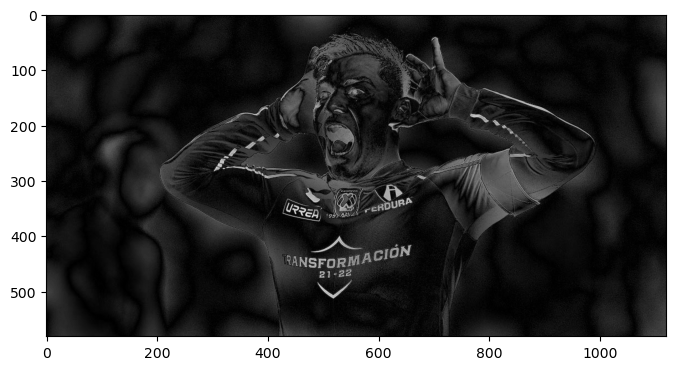

In [156]:
plt.figure(figsize=(8, 6))
plt.imshow(abs(imagen1), cmap='gray')

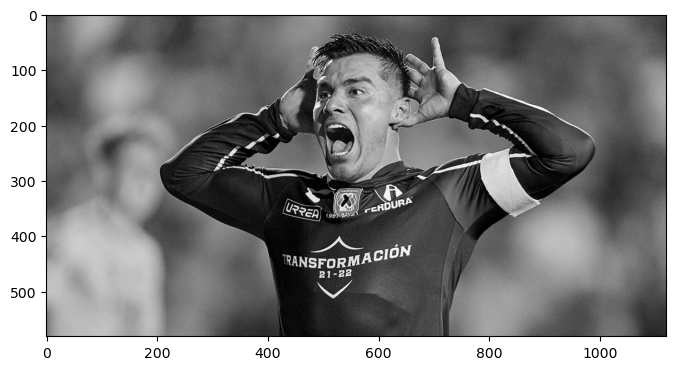

In [158]:
rocha = img.imread('rocha.jpg')
plt.figure(figsize=(8, 6))
rocha= rocha[:,:,1]
plt.imshow(rocha, cmap='gray');

In [3]:
dat=np.loadtxt('Halo_list_NO_FOFR_1000.txt')

min_x = np.min(dat[:,0]) 
max_x = np.max(dat[:,0])
min_y = np.min(dat[:,1]) 
max_y = np.max(dat[:,1])
min_z = np.min(dat[:,2])
max_z = np.max(dat[:,2])

print("el valor mínimo en x es", min_x)
print("el valor máximo en x es", max_x)

print("el valor mínimo en y es", min_y)
print("el valor máximo en y es", max_y)   


print("el valor mínimo en z es", min_z)
print("el valor máximo en z es", max_z)

el valor mínimo en x es 0.033786
el valor máximo en x es 999.966125
el valor mínimo en y es 0.040336
el valor máximo en y es 999.954712
el valor mínimo en z es 0.054647
el valor máximo en z es 999.976807


In [4]:
dat.shape
#####

(616457, 4)

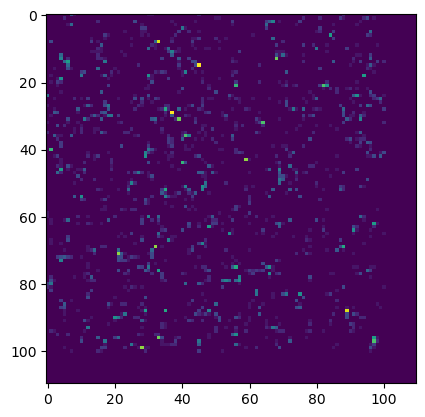

In [5]:
dat_n = dat/10
num_dat = dat.shape[0]

x=np.zeros((110,110,110))
for t in range(num_dat):
    i,j,k=np.round(dat_n[t,:3])
    x[int(i),int(j),int(k)]+=1

plt.imshow(x[:,0,:])

Text(0.5, 1.0, 'Parte imaginaria')

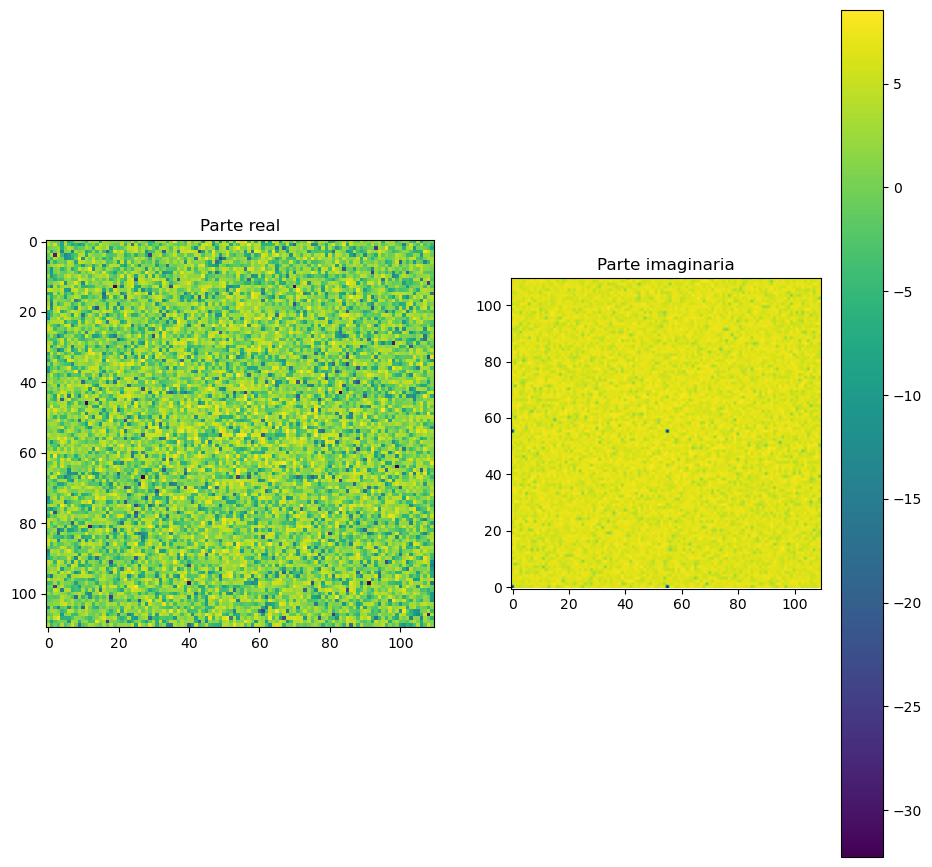

In [19]:
#Tomamos una de las capas de la transformada para presentarla
r=trans3.real[:,0,:]

#Aqupi ponemos la parte real de la transformada
plt.figure(figsize=(11,11))

plt.subplot(1, 2, 1)
plt.imshow(np.log(abs(r)))
plt.title("Parte real")

#Aquí la parte imagianria 
#Tomamos una de las capas de la transformada para presentarla
i=trans3.imag[:,0,:]

#Aqupi ponemos la parte real de la transformada
plt.subplot(1, 2, 2)
plt.imshow(np.log(abs(i)),origin = 'lower')
plt.colorbar()
plt.title("Parte imaginaria")

#plt.show()

In [ ]:
plt.imshow(fft.)